## First exercise
#### Count the number of lines in Python for each file

In [15]:
#File bookings.csv.bz2
import pandas as pd
import numpy as np
import bz2
path='/home/dsc/Data/challenge/bookings.csv.bz2'
name_file='bookings.csv.bz2'

file_open=bz2.open(name_file,mode='r',compresslevel=9, encoding=None, errors=None, newline=None)
count=0
for line in file_open:
    count=count+1
print(count)

10000011


In [16]:
#File searches.csv.bz2
import pandas as pd
import numpy as np
import bz2
path='/home/dsc/Data/challenge/searches.csv.bz2'
name_file='searches.csv.bz2'

file_open=bz2.open(name_file,mode='r',compresslevel=9, encoding=None, errors=None, newline=None)
count=0
for line in file_open:
    count=count+1
print(count)


20390199


## Second exercise: top 10 arrival airports in the world in 2013 (using the booking files)
#### Arrival airport is the column arr-port. It is the IATA code for the airport. To get the total number of passengers for an airport, you can sum the columns pax, grouping by arr_port. Note that there is negative pax. That correspond to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the cancelled bookings). Print the top 10 arrival airports in the standard output, including the number of passengers
#### Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in GitHub)
#### Bonus point: Solve this problem using pandas (instead of other approach)

In [32]:
#Creome un sample, un archivo maáis pequeno para traballar sobre el
! bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -100000 | bzip2 -c > /home/dsc/Data/challenge/bookings.sample.csv.bz2


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [102]:
import pandas as pd
path_sample='/home/dsc/Data/challenge/bookings.sample.csv.bz2'
open_sample=pd.read_csv(path_sample, sep='^', compression='bz2')
#Para limpiar os espazos en blanco
open_sample=open_sample.columns.str.strip()
open_sample.tolist()

['act_date',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid',
 'rloc',
 'cre_date',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time',
 'off_time',
 'pax',
 'year',
 'month',
 'oid']

In [6]:
#Estos son os top 10 aeroportos con máis pasaxeiros do 2013
import pandas as pd
path_sample='/home/dsc/Data/challenge/bookings.sample.csv.bz2'
open_sample=pd.read_csv(path_sample, sep='^', compression='bz2')
#Solo me collo o ano 2013
open_sample=open_sample[open_sample['year']==2013]
#Unha vez que teño seleccionado a do 2013, elimino a columna de year.
open_sample=open_sample.drop('year',axis=1)
#Elimino os espazos en blanco das columnas.
#open_sample=open_sample.columns.str.strip()
#Agrupo por arr_port e sumo o número de psaxeiros
open_sample=open_sample.groupby('arr_port').sum().sort_values(by='pax',ascending=False).head(10)
open_sample['pax']

arr_port
LHR         1006
MCO          861
JFK          795
LAX          761
BKK          747
LAS          732
SFO          705
ORD          686
CDG          676
DXB          587
Name: pax, dtype: int64

In [43]:
open_sample.sort_values?

In [2]:
import pandas as pd
import numpy as np
#Vamos a utilizar o archivo gordo
path='/home/dsc/Data/challenge/bookings.csv.bz2'

chunksize_big = 10000 #For production
chunksize_small=100  #for  testing
#abrimos o archivo collendo as columnas que queremos, e facendo subdivios (chunksize) de 100 líneas do archivo para
#trabllar con eĺ de forma máis fácil xa que é mui grande.
open_file_chunk=pd.read_csv(path, sep='^', usecols=['arr_port','pax','year'], compression='bz2',chunksize=chunksize_big)

#Creamos un data frame vacío ao que lle vams añadindo os diferentes chunks
df_final=pd.DataFrame()
for df in open_file_chunk:
    #Seleccionamos o 2013
    df=df[df['year']==2013]
    #Eliminmos a columna yeara que xa non me fai falta
    df=df.drop(labels='year',axis=1)
    df=df.groupby('arr_port').sum()
    df_final=df_final.append(df)

print(df_final.groupby('arr_port').sum().sort_values(by='pax',ascending=False).head(10))


              pax
arr_port         
LHR       88809.0
MCO       70930.0
LAX       70530.0
LAS       69630.0
JFK       66270.0
CDG       64490.0
BKK       59460.0
MIA       58150.0
SFO       58000.0
DXB       55590.0


## Third exercise: plot the monthly number of searches for flights arriving at Malaga, Madrid or Barcelona
#### For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Malaga, another one for Madrid, and another one for Barcelona, in the same figure.
#### Bonus point: Solving this problem using pandas (instead of any other approach)

In [5]:
#ESto fagoo para ver as columnas que hai e colloer as que me intersan a min
import pandas as pd
import numpy as np
path_file= '/home/dsc/Data/challenge/searches.csv.bz2'
file_name= 'searches.csv.bz2'

chunksize_small=100
chunksize_big=100000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_small,nrows=100,compression='bz2')
for df in open_file:
    print(df.columns)


Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')


In [7]:
#Con esto fágome unha idea dos NaN que hai no arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 45 columns):
Date                 100 non-null object
Time                 100 non-null object
TxnCode              100 non-null object
OfficeID             100 non-null object
Country              100 non-null object
Origin               100 non-null object
Destination          100 non-null object
RoundTrip            100 non-null int64
NbSegments           100 non-null int64
Seg1Departure        100 non-null object
Seg1Arrival          100 non-null object
Seg1Date             100 non-null object
Seg1Carrier          29 non-null object
Seg1BookingCode      3 non-null object
Seg2Departure        68 non-null object
Seg2Arrival          68 non-null object
Seg2Date             68 non-null object
Seg2Carrier          15 non-null object
Seg2BookingCode      2 non-null object
Seg3Departure        1 non-null object
Seg3Arrival          1 non-null object
Seg3Date             1 non-null object
Seg3Carrier

In [51]:
df.rename?

In [ ]:
df=df.reset_index

In [140]:
#Debido al tamaño del archivo "seraches file, lo voy a abrir con los chunkes y con el n rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


path_file= '/home/dsc/Data/challenge/searches.csv.bz2'
file_name= 'searches.csv.bz2'

chunksize_small=100
chunksize_big=600000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_big, usecols=['Destination','Date'],nrows=1000,compression='bz2')
df_final=pd.DataFrame()
for df in open_file:
    #Elimino os NaN
    df=df.dropna()
    #Da columna Destination collo os destinos que me interesan, BCN,AGP,MAD.
    df=df[df['Destination'].isin(['BCN','AGP','MAD'])]
    #Pomos a columna date nun formato que correcto.
    df['Mes'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
    #Creo uha nova columna que conteña solo o mes, que o extraaigo da columna Date
    df['Mes']=df['Date'].str.slice(0,7)
    #Agrupo por Destination e Count e conto o número de ocurrencias
    df=df.groupby(['Mes','Destination']).count()
    #Cambiolle o nome a columna Date por Searches.
    df=df.rename(columns={'Date':'Searches'})
    df_final=df_final.append(df)

#O 'reset_index' é pa que cho baixe o MEs e che poña o Mes o mesmo nivel que a Destination e o Date
result=df_final.groupby(['Mes','Destination']).sum().reset_index()
result


,Mes,Destination,Searches
0,2013-01,AGP,7
1,2013-01,BCN,26
2,2013-01,MAD,11


### Unha vez que temos a tabla vamos a facer o gráfico onde se van mostrar os 3 aeroportos.


In [120]:
#ESto non é necesario facelo. A hora de facer o gráfico funciona igual
result.pivot('Mes','Destination','Searches')

Destination,AGP,BCN,MAD
Mes,,,
2013-01,128,255,234
2013-02,117,229,208
2013-03,138,253,230
2013-04,27,84,75


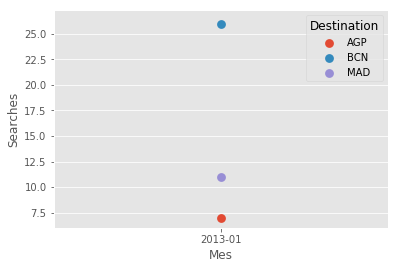

In [133]:
#Utilicei o paquete seaborn, porque me gusta máis e queda mellor
import seaborn as sns
sns.pointplot(x="Mes", y="Searches", hue="Destination", data=result)

In [143]:
#Unha vez feitas toas as comprobacións, leo o archivo enteiro quitando o nrows.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


path_file= '/home/dsc/Data/challenge/searches.csv.bz2'
file_name= 'searches.csv.bz2'

chunksize_small=100
chunksize_big=600000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_big, usecols=['Destination','Date'],compression='bz2')
df_final=pd.DataFrame()
for df in open_file:
    #Elimino os NaN
    df=df.dropna()
    #Da columna Destination collo os destinos que me interesan, BCN,AGP,MAD.
    df=df[df['Destination'].isin(['BCN','AGP','MAD'])]
    #Pomos a columna date nun formato que correcto.
    df['Mes'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
    #Creo uha nova columna que conteña solo o mes, que o extraaigo da columna Date
    df['Mes']=df['Date'].str.slice(0,7)
    #Agrupo por Destination e Count e conto o número de ocurrencias
    df=df.groupby(['Mes','Destination']).count()
    #Cambiolle o nome a columna Date por Searches.
    df=df.rename(columns={'Date':'Searches'})
    df_final=df_final.append(df)

#O 'reset_index' é pa que cho baixe o MEs e che poña o Mes o mesmo nivel que a Destination e o Date
result=df_final.groupby(['Mes','Destination']).sum().reset_index()
result

,Mes,Destination,Searches
0,2013-01,AGP,9633
1,2013-01,BCN,29469
2,2013-01,MAD,24258
3,2013-02,AGP,8379
4,2013-02,BCN,28329
5,2013-02,MAD,22800
6,2013-03,AGP,10659
7,2013-03,BCN,30552
8,2013-03,MAD,24681
9,2013-04,AGP,8265


In [145]:
sns.pointplot?

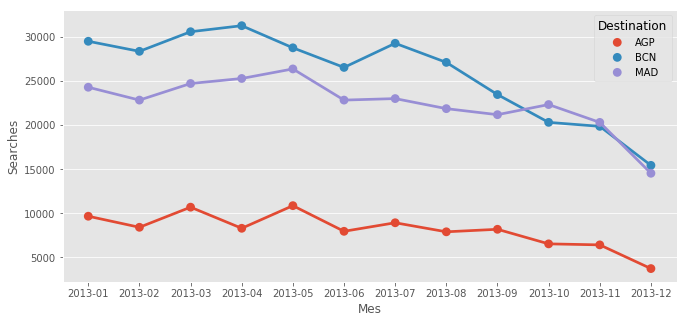

In [160]:
import seaborn as sns
#Esto é para cmabiar o tamaño do eixe x que senon solapanse as datas
plt.figure(figsize=(11,5))
sns.pointplot(x="Mes", y="Searches", hue="Destination", data=result)

## Ejercicio 4
#### Match searches with bookings

For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.


## Estos son probas para ver como son or archivos.

In [187]:
#Fago esto par botar un primer vistazo o archivo de bookings
import pandas as pd
import numpy as np
import bz2
path='/home/dsc/Data/challenge/bookings.csv.bz2'
name_file='bookings.csv.bz2'

chunksize_small=100
chunksize_big=300000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_small,nrows=100,compression='bz2', low_memory=False)
df_final=pd.DataFrame()
for df in open_file:
    df_final=df_final.append(df)
    
df_final.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [195]:
#Fago esto par botar un primer vistazo o archivo de searches
import pandas as pd
import numpy as np
import bz2
path_file= '/home/dsc/Data/challenge/searches.csv.bz2'
file_name= 'searches.csv.bz2'

chunksize_small=100
chunksize_big=300000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_small,nrows=1000,compression='bz2', low_memory=False)
df_final=pd.DataFrame()
for df in open_file:
    df_final=df_final.append(df)
    
df_final.columns.tolist()


SyntaxError: invalid syntax (<ipython-input-195-e48c5c2a5d9c>, line 2)

### Arreglamos os archivo de BOOKINGS quitando os duplicados e pondo todo noutro archivo CSV.

In [2]:
#ESto facemolo para ver se o archivo ten duplicados. E observamos que unha vez que se elimina os duplicados solo é un
#archivo de 718002 celdas. É dicir que en realidad unha vez que quitas od diplicado s o archivo non é tan grande.

import pandas as pd
import numpy as np
import bz2
path='/home/dsc/Data/challenge/bookings.csv.bz2'
name_file='bookings.csv.bz2'

chunksize_small=100
chunksize_big=300000
open_file=pd.read_csv(path,sep='^',chunksize=chunksize_big,compression='bz2', low_memory=False)
all_chunk=pd.DataFrame()
for i,chunk in enumerate(open_file):
    all_chunk=all_chunk.append(chunk)
    all_chunk=all_chunk.drop_duplicates()
    print(i,len(all_chunk))

0 300000
1 600000
2 900000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 1000000
11 1000000
12 1000000
13 1000000
14 1000000
15 1000000
16 1299993
17 1299993
18 1299993
19 1299993
20 1299993
21 1299993
22 1299993
23 1299993
24 1299993
25 1299993
26 1299993
27 1299993
28 1299993
29 1299993
30 1299993
31 1299993
32 1299993
33 1299993


In [3]:
#Gardamos todo noutro archivo csv
all_chunk.to_csv('bookings_with_no_duplicates.csv', sep='^',index=False)

In [4]:
open_bookings_with_no_duplicates=pd.read_csv('bookings_with_no_duplicates.csv',sep='^',low_memory=False)
open_bookings_with_no_duplicates.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


In [5]:
len(open_bookings_with_no_duplicates)

1299993

In [36]:
#Vamos coller as columnas que nos interesan e eliminar espacios en blancos delas.
all_chunk.columns.tolist()

AttributeError: 'Index' object has no attribute 'columns'

In [34]:
#Aplicamos un strip os titulos das columnas para elimar espazos en blanco
all_chunk=all_chunk.columns.map(lambda x:str(x).strip())

AttributeError: 'Index' object has no attribute 'columns'

In [17]:
all_chunk.tolist()

['act_date',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid',
 'rloc',
 'cre_date',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time',
 'off_time',
 'pax',
 'year',
 'month',
 'oid']

In [41]:
b=open_bookings_with_no_duplicates[['cre_date','act_date', 'dep_port', 'arr_port']].copy()

KeyError: "['cre_date' 'act_date'] not in index"

In [40]:
#Xa o tes ben porque non tes espacios nas columnas.Senon terias que eliminalos. Mais adiante xa eliminas s espacios porque hai espazo
open_bookings_with_no_duplicates.iloc[0].tolist()

['2013-03-05 00:00:00',
 '1A    ',
 'DE      ',
 'a68dd7ae953c8acfb187a1af2dcbe123',
 '1a11ae49fcbf545fd2afc1a24d88d2b7',
 'ea65900e72d71f4626378e2ebd298267',
 '2013-02-22 00:00:00',
 '1708',
 '0',
 'ZRH     ',
 'ZRH     ',
 'CH      ',
 'LHR     ',
 'LON     ',
 'GB      ',
 'ZRH     ',
 'ZRH     ',
 'CH      ',
 'LHR     ',
 'LON     ',
 'GB      ',
 'ZRH     ',
 'ZRH     ',
 'CH      ',
 'LHRZRH  ',
 'LONZRH  ',
 'CHGB    ',
 '1',
 'LHRZRH         ',
 'VI',
 'T        ',
 'Y        ',
 '2013-03-07 08:50:00',
 '2013-03-07 11:33:37',
 -1.0,
 2013.0,
 3.0,
 'NULL     ']

In [250]:
#Vamos ver como están os NAN do archivo bookings. Observamos que solo existe un NAN.
#Non sei que pasa pero non me sale
b=b.dropna()
print(len(b),len(all_chunk))

718002 718003


### Arreglamos os archivo de SEARCHES quitando os duplicados e pondo todo noutro archivo CSV.

In [206]:
import pandas as pd
import numpy as np
import bz2
path_file= '/home/dsc/Data/challenge/searches.csv.bz2'
file_name= 'searches.csv.bz2'

%time
chunksize_small=100
chunksize_big=300000
open_file=pd.read_csv(path_file,sep='^',chunksize=chunksize_big,compression='bz2', low_memory=False)
all_chunk_s=pd.DataFrame()
for i,chunk in enumerate(open_file):
    all_chunk_s=all_chunk_s.append(chunk)
    all_chunk_s=all_chunk_s.drop_duplicates()
    print(i,len(all_chunk_s))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
0 299999
1 358999
2 358999
3 358999
4 658992
5 718002
6 718002
7 718002
8 718002
9 718002
10 718002
11 718002
12 718002
13 718002
14 718002
15 718002
16 718002
17 718002
18 718002
19 718002
20 718002
21 718002
22 718002
23 718002
24 718002
25 718002
26 718002
27 718002
28 718002
29 718002
30 718002
31 718002
32 718002
33 718002
34 718002
35 718002
36 718002
37 718002
38 718002
39 718002
40 718002
41 718002
42 718002
43 718002
44 718002
45 718002
46 718002
47 718002
48 718002
49 718002
50 718002
51 718002
52 718002
53 718002
54 718002
55 718002
56 718002
57 718002
58 718002
59 718002
60 718002
61 718002
62 718002
63 718002
64 718002
65 718002
66 718002
67 718003


In [252]:
len(all_chunk_s)

718003

In [227]:
#Gardamos o archivo de searches se valores duplicados nun archivo CSV diferente
all_chunk_s.to_csv('searches_with_no_duplicates.csv',sep='^',index=False)

In [228]:
open_searches_with_no_duplicates=pd.read_csv('searches_with_no_duplicates.csv',sep='^',low_memory=False)
open_searches_with_no_duplicates.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [229]:
#Vamos ver se as columnas teñen espazos. Comprobamos que non teñen espazos e que está todo ben
all_chunk_s.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [238]:
#Comprobamos se os datos nas columnas están ben. EStán ben, non hai espazos en blanco
s=all_chunk_s[['Date','Origin','Destination']].copy()
s.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [240]:
#Como podemos observar nono existen espazos en blanco
s.iloc[0].tolist()

['2013-01-01', 'TXL', 'AUH']

In [251]:
#Vamos ver como están os NAN do archivo searches.
s=s.dropna()
print(len(s),len(all_chunk_s))

718002 718003


## Eiqui está o exercicio resolto en limpo. O anterior eran probas. 
## Unha vez que sabemos o archivo como é pasamos a accion.

In [90]:
#Borro tódalas variables para empezar dende 0.bb
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [108]:
pd.read_csv?

In [59]:
#Tabla dos bookings

import pandas as pd

path_file_b='/home/dsc/Data/challenge/bookings.csv.bz2'

name_file_b='bookings.csv.bz2'

chunk_small= 1000
chunk_big=10000

open_b=pd.read_csv(path_file_b, sep='^', usecols=['act_date           ','dep_port', 'arr_port'], index_col=False, compression='bz2', nrows=1000, chunksize=chunk_small)

df_final_b=pd.DataFrame()
for df_b in open_b:
    #Eliminamos os NAN
    df_b=df_b.dropna()
    #Eliminamos os duplicados
    df_b=df_b.drop_duplicates()
    df_final_b=df_final_b.append(df_b)

#Eliminamos os espazos nos titulos das columnas, porque vemos que hai espazos ca seguinte función:
#df_final_b.columns.tolist()
df_final_b.columns=df_final_b.columns.map(lambda x: str(x).strip())
#Eliminamos os espazos en blanco do contido das columnas.
#df_final_b.iloc[0].tolist()
df_final_b['dep_port']=df_final_b['dep_port'].map(lambda x:str(x).strip().upper())
df_final_b['arr_port']=df_final_b['arr_port'].map(lambda x:str(x).strip().upper())  
#Pasamos a datađ do act_date a un formato estandar
df_final_b['act_date']=pd.to_datetime(df_final_b['act_date'],errors='raise')

df_final_b



,act_date,dep_port,arr_port
0,2013-03-05,ZRH,LHR
1,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
5,2013-03-20,DEN,LGA
7,2013-03-25,NRT,SIN
11,2013-03-28,NRT,SIN
19,2013-03-13,YYZ,TUS
20,2013-03-25,FCO,CTA
22,2013-03-12,BDQ,YWG
24,2013-03-13,BDQ,YWG


In [3]:
#Tabla dos Searches
import pandas as pd

path_file_s='/home/dsc/Data/challenge/searches.csv.bz2'

name_file_s='searches.csv.bz2'

chunk_small= 1000
chunk_big=10000

open_s=pd.read_csv(path_file_s, sep='^', usecols=['Date', 'Origin','Destination'], index_col=False, compression='bz2', nrows=1000, chunksize=chunk_small)

df_final_s=pd.DataFrame()
for df_s in open_s:
    #Eliminamos os NAN
    df_s=df_s.dropna()
    #Eliminamos os duplicados
    df_s=df_s.drop_duplicates()
    df_final_s=df_final_s.append(df_s)

#Non fai falta eliminar os espazos do contido das columnas porque coa seguinte función observamos que non hai:
#df_final_s.iloc[0].tolist()
#Non fai falta eliminar os espazos en blanco do contido das columnas porque coa seguinte funcion observamos que non hai:
#df_final_s.columns.tolist()
#Pasamos a columna da Date a un formato estándar
df_final_s['Date']=pd.to_datetime(df_final_s['Date'], errors='raise')

df_final_s

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD
5,2013-01-01,IAH,BLR
6,2013-01-01,CPH,PAR
7,2013-01-01,PAR,DUB
8,2013-01-01,DUS,ACE
9,2013-01-01,FRA,BGW


In [10]:
#Tabla dos bookings pero collendo todo o archivo. PAra eso eliminamos os n_rows da función read_csv, e metemos 
# o chunksize grande

import pandas as pd

path_file_b='/home/dsc/Data/challenge/bookings.csv.bz2'

name_file_b='bookings.csv.bz2'

chunk_small= 1000
chunk_big=90000

open_b=pd.read_csv(path_file_b, sep='^', usecols=['act_date           ','dep_port', 'arr_port'], index_col=False, compression='bz2', chunksize=chunk_big)

df_final_b=pd.DataFrame()
for df_b in open_b:
    #Eliminamos os NAN
    df_b=df_b.dropna()
    #Eliminamos os duplicados
    df_b=df_b.drop_duplicates()
    df_final_b=df_final_b.append(df_b)

#Eliminamos os espazos nos titulos das columnas, porque vemos que hai espazos ca seguinte función:
#df_final_b.columns.tolist()
df_final_b.columns=df_final_b.columns.map(lambda x: str(x).strip())
#Eliminamos os espazos en blanco do contido das columnas.
#df_final_b.iloc[0].tolist()
df_final_b['dep_port']=df_final_b['dep_port'].map(lambda x:str(x).strip().upper())
df_final_b['arr_port']=df_final_b['arr_port'].map(lambda x:str(x).strip().upper())  
#Volvemos a eliminar os duplicados
df_final_b=df_final_b.drop_duplicates()
#Pasamos a datađ do act_date a un formato estandar
df_final_b['act_date']=pd.to_datetime(df_final_b['act_date'],errors='raise')

df_final_b

,act_date,dep_port,arr_port
0,2013-03-05,ZRH,LHR
1,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
5,2013-03-20,DEN,LGA
7,2013-03-25,NRT,SIN
11,2013-03-28,NRT,SIN
19,2013-03-13,YYZ,TUS
20,2013-03-25,FCO,CTA
22,2013-03-12,BDQ,YWG
24,2013-03-13,BDQ,YWG


In [11]:
#Tabla dos Searches pero collendo todo o archivo. PAra eso eliminamos os n_rows da función read_csv, e metemos o chunksize
#grande
import pandas as pd

path_file_s='/home/dsc/Data/challenge/searches.csv.bz2'

name_file_s='searches.csv.bz2'

chunk_small= 1000
chunk_big=90000

open_s=pd.read_csv(path_file_s, sep='^', usecols=['Date', 'Origin','Destination'], index_col=False, compression='bz2', chunksize=chunk_big)

df_final_s=pd.DataFrame()
for df_s in open_s:
    #Eliminamos os NAN
    df_s=df_s.dropna()
    #Eliminamos os duplicados
    df_s=df_s.drop_duplicates()
    df_final_s=df_final_s.append(df_s)

#Non fai falta eliminar os espazos do contido das columnas porque coa seguinte función observamos que non hai:
#df_final_s.iloc[0].tolist()
#Non fai falta eliminar os espazos en blanco do contido das columnas porque coa seguinte funcion observamos que non hai:
#df_final_s.columns.tolist()
#Volvemos a eliminar os duplicados
df_final_s=df_final_s.drop_duplicates()
#Pasamos a columna da Date a un formato estándar
df_final_s['Date']=pd.to_datetime(df_final_s['Date'], errors='raise')

df_final_s

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD
5,2013-01-01,IAH,BLR
6,2013-01-01,CPH,PAR
7,2013-01-01,PAR,DUB
8,2013-01-01,DUS,ACE
9,2013-01-01,FRA,BGW


### Se establece el modelo hipótesis a seguir:
if there is one booking for a given O&D done at the same day as the search (for a given O&D), ALL searches of the day (for a given 0&D) might have resulted from the same source and will be set with 1.
This is regardless of the boarding time of the plane... So if I was looking for plane for the first 4 days of December for a given O&D all those searches would be set to 1 not just the one correspoding to the correct boarding time

In [12]:
#Cruzamos as dúas tablas polas variable en común. Cubrimos os NA da nova tabla que resuulte do cruce con 0.
b_vs_s=df_final_b.merge(df_final_s, how= 'left', left_on=['act_date','dep_port','arr_port'], right_on=['Date', 'Origin','Destination']).fillna (0)
#Despois creamos unha nova columna con 1 e 0 dependendo de si hai match entre as duas tablas ou non.
b_vs_s['Booked']=b_vs_s['Destination'].map(lambda x: 0 if x==0 else 1)
b_vs_s

,act_date,dep_port,arr_port,Date,Origin,Destination,Booked
0,2013-03-05,ZRH,LHR,2013-03-05 00:00:00,ZRH,LHR,1
1,2013-03-26,SAL,CLT,0,0,0,0
2,2013-03-26,AKL,SVO,0,0,0,0
3,2013-03-20,DEN,LGA,0,0,0,0
4,2013-03-25,NRT,SIN,0,0,0,0
5,2013-03-28,NRT,SIN,0,0,0,0
6,2013-03-13,YYZ,TUS,0,0,0,0
7,2013-03-25,FCO,CTA,0,0,0,0
8,2013-03-12,BDQ,YWG,0,0,0,0
9,2013-03-13,BDQ,YWG,0,0,0,0


In [96]:
b_vs_s.groupby('Booked').count()
#Por lo tanto de las 450497 reservas, 15731 acabaro en reserva.

,act_date,dep_port,arr_port,Date,Origin,Destination
Booked,,,,,,
0,450497,450497,450497,450497,450497,450497
1,15731,15731,15731,15731,15731,15731


## Gardo a tabla b_vs_s nun archivo csv como un archivo csv

In [17]:
b_vs_s.to_csv?

In [16]:
b_vs_s.to_csv('b_vs_s.csv', sep='^')
    
